# Testing the functionality of bare metal capability of MetaTuner
- Seeing exploration is not struck in a single objecitve.
- Exploration is prioritized for functions have high optimum values.
- Mango is able to find optimum values for all the objectives as well
- Todo: Results are stored internally, need to clean up the scheduling abstractions, results return and improve internal config management

In [1]:
from mango import scheduler, MetaTuner

# Parameter space and 3 objective functions to search

In [2]:
from scipy.stats import uniform

param_space1 = dict(x=uniform(-10, 22))
param_space2 = dict(x=uniform(-10, 47))
param_space3 = dict(x=uniform(-10, 47))


# Objective-1: Cube: Exact max value is: 12*12*12 = 1728
@scheduler.serial
def objective_1(x):
    return x*x*x

# Objective-2: Square: Exact max value is: 37*37 = 1369
@scheduler.serial
def objective_2(x):
    return x*x

# Objective-3: Abs" Exact max value is: 37*37 = 1369
@scheduler.serial
def objective_3(x):
    return 37*abs(x)

param_space_list = [param_space1, param_space2, param_space3]
objective_list = [objective_1, objective_2, objective_3]


# MetaTuner Abstraction

In [3]:
metatuner = MetaTuner(param_space_list, objective_list)
metatuner.num_of_iterations = 50

In [4]:
metatuner.run()

# Print the Max value discovered for each objective

In [5]:
print("Discovered Max values from each objective function")
print('Max value of Cube:', metatuner.Y_dict_array_max[0][-1])
print('Max value of Square:', metatuner.Y_dict_array_max[1][-1])
print('Max value of Abs:', metatuner.Y_dict_array_max[2][-1])

Discovered Max values from each objective function
Max value of Cube: [1711.04954146]
Max value of Square: [1368.92331737]
Max value of Abs: [1366.03447685]


# Visualize the function evaluation order done internally

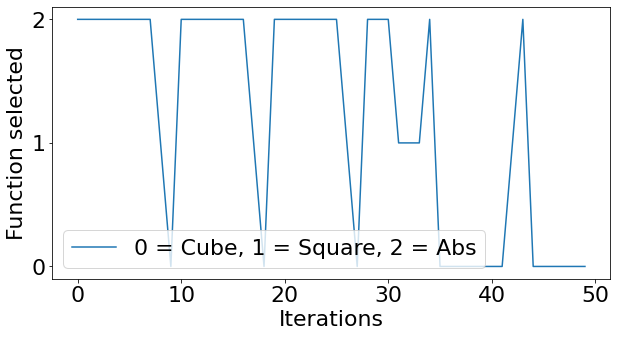

In [6]:
from matplotlib import pyplot as plt

plt.rcParams.update({'font.size': 22})


fig = plt.figure(figsize=(10,5))
    
    
ax = fig.add_subplot(111)
    
ax.plot(metatuner.objectives_evaluated,label = '0 = Cube, 1 = Square, 2 = Abs')

plt.yticks([0,1, 2])

plt.ylabel('Function selected')
plt.xlabel('Iterations')

plt.legend(loc="lower left")

plt.show()

# Count the number of Evaluations done for each function

In [7]:
count_1 = 0
count_2 = 0
count_3 = 0

#print('0 = Cube, 1 = Square, 2 = Abs')
for val in metatuner.objectives_evaluated:
    if val==0:
        count_1+=1
    if val==1:
        count_2+=1
    if val==2:
        count_3+=1
#print(count_1, count_2, count_3)

print("Cube is run for:   ", count_1, " iterations")
print("Square is run for: ", count_2, " iterations")
print("Abs is run for:    ", count_3, " iterations")

Cube is run for:    16  iterations
Square is run for:  7  iterations
Abs is run for:     27  iterations


# See the change in the optimum discovered value for each function with iterations

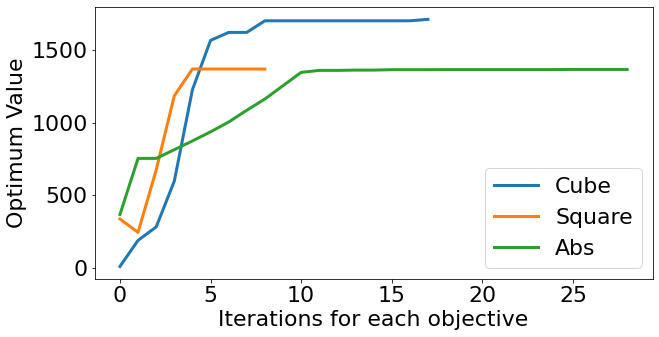

In [8]:
from matplotlib import pyplot as plt

plt.rcParams.update({'font.size': 22})


fig = plt.figure(figsize=(10,5))
    
    
ax = fig.add_subplot(111)
    
ax.plot(metatuner.Y_dict_array_max[0], label = 'Cube', linewidth = 3)
ax.plot(metatuner.Y_dict_array_max[1], label = 'Square', linewidth = 3)
ax.plot(metatuner.Y_dict_array_max[2], label = 'Abs', linewidth = 3)


plt.ylabel('Optimum Value')
plt.xlabel('Iterations for each objective')


plt.legend()

plt.show()